In [1]:
%matplotlib inline
import os, pickle, glob
import cv2
import re
import matplotlib
import numpy as np
import FileIO as fio
import Camera as camsolve
from matplotlib import pyplot as plt
from collections import defaultdict
plt.style.use("ggplot")

In [2]:
rt_path = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging"
bvh_dir = "resolve_bvh2mat"
marker_dir = "meta_mid"
camparam_dir = "meta_mid/cameras/subj_take/"
timecorr_dir = "meta_mid/alignments"
day_list = ["20180831", "20180901", "20180902", "20180903", "20180906",
           "20180907", "20180911"]

In [3]:
subj2camparam = {
    "liyan": "20180831_liyan_camparams.pkl", "lisi": "20180901_lisi_camparams.pkl",
    "deying": "20180901_lisi_camparams.pkl", "haoyu": "20180902_haoyu_camparams.pkl",
    "shau": "20180902_haoyu_camparams.pkl", "jingwen": "20180903_jingwen_camparams.pkl",
    "zhe": "20180903_jingwen_camparams.pkl", "xie": "20180906_yan_camparams.pkl",
    "yan": "20180906_yan_camparams.pkl", "dy": "20180907_dy_camparams.pkl",
    "tang": "20180907_dy_camparams.pkl", "ryan": "20180911_ryan_camparams.pkl"}
subj2day = {
    "liyan": "20180831", "lisi": "20180901", "deying": "20180901", "haoyu": "20180902",
    "shau": "20180902", "jingwen": "20180903", "zhe": "20180903", "xie": "20180906",
    "yan": "20180906", "dy": "20180907", "tang": "20180907", "ryan": "20180911"}

In [4]:
def spath(subdir):
    return "{:}/{:}".format(rt_path, subdir)

In [5]:
def augpath(base_dir):
    def _augpath(subdir):
        return "{:}/{:}".format(base_dir, subdir)
    return _augpath

# Write Camera Parameters

In [20]:
def orig_cam_param(subj):
    return "{:}/meta_mid/cameras/{:}".format(rt_path, subj2camparam[subj])

In [22]:
dir_path = "{:}/{:}".format(rt_path, camparam_dir)
subj_take_table = defaultdict(dict)
ptn = re.compile("(action_\d{2})|(motion_\d{2})|(zw_static_\d{2})")
for f in glob.glob("{:}/*_camparams.pkl".format(dir_path)):
    fname = os.path.basename(f)
    sub = fname.split("_")[0]
    take = ptn.search(fname).group(0)
    subj_take_table[sub][take] = f

In [12]:
camparams = fio.load_pkl(subj_take_table["liyan"]["action_00"])

In [28]:
for subj, record in subj_take_table.items():
    for take, file in record.items():
        base_param = fio.load_pkl(orig_cam_param(subj))
        if (subj, take) == ("liyan", "action_02"):
            print(file)
            base_param["04"] = camparam_e
        fio.dump_pkl(base_param, file)

/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/meta_mid/cameras/subj_take/liyan_action_02_camparams.pkl


# Gather Master Version Info

In [ ]:
cam_dict = fio.load_cam(apath.camparam_file)
imgdir_io = fio.ImgDirIO(apath.day_subdir, subj, takename)
viddir_io = fio.VideoDirIO(apath.day_subdir, subj, takename)
marker_io = fio.MarkerDirIO(apath.marker_dir)
joint_io = fio.BVHDirIO(apath.bvh_dir)
img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

In [12]:
timeparam_dict = defaultdict(dict)
for subj, record in time_io.subj_take_table.items():
    for take, f in record.items():
        corr = fio.load_pkl(f)
        for cam, corr_pairs in corr.items():
            if (subj, take, cam) not in fio.CamParamDir.block_list:
                print(subj, take, cam, camsolve.ransac_linear_regress(corr_pairs))

zhe motion_01 00 (array([0.15]), -205749.7228499999, 55, 50)
zhe motion_01 02 (array([0.15]), -457548.25910000014, 41, 39)
zhe motion_01 01 (array([0.15000707]), -205764.45062377557, 55, 51)
zhe motion_01 03 (array([0.12]), 266.84400000000096, 32, 32)
zhe motion_01 04 (array([0.12]), 1336.0079999999998, 37, 37)
zhe action_02 00 (array([0.15]), -185731.6432999999, 34, 34)
zhe action_02 02 (array([0.15]), -437531.17940000014, 33, 33)
zhe action_02 01 (array([0.15]), -185738.27179999996, 35, 35)
zhe action_02 03 (array([0.12]), 250.12800000000243, 22, 22)
zhe action_02 04 (array([0.1199752]), 1408.8126759069555, 57, 35)
zhe action_01 00 (array([0.15]), -168798.71065, 67, 67)
zhe action_01 02 (array([0.15003038]), -420684.89361642837, 47, 39)
zhe action_01 03 (array([0.12]), 285.7399999999998, 23, 23)
zhe action_01 01 (array([0.15]), -168805.33914999999, 35, 35)
zhe action_01 04 (array([0.11999303]), 1560.6580592358423, 45, 45)
zhe zw_static_02 00 (array([0.15]), -151638.1885, 51, 51)
zhe 

# For a single subject

In [5]:
cam_io = fio.CamParamDir("{:}/{:}".format(rt_path, camparam_dir))
time_io = fio.TimeParamDir("{:}/{:}".format(rt_path, timecorr_dir))

subj, takename = "haoyu", "motion_01"
cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
imgdir_io = fio.ImgDirIO(spath(subj2day[subj]), subj, takename)
viddir_io = fio.VideoDirIO(spath(subj2day[subj]), subj, takename)
marker_io = fio.MarkerDirIO(spath(marker_dir))
joint_io = fio.BVHDirIO(spath(bvh_dir))
img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

In [10]:
cam = "04"
ts = viddir_io.read_cam_ts(cam)
joint_list = []
for t in ts:
    mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
    if mocap_t < mkr_reader.get_joint_frame_num():
        joint_list.append(mkr_reader.read_raw_joint(mocap_t))

In [12]:
cam = "00"
frame_ts = imgdir_io.get_imgfile_timestamp(cam)
joint_list = []
for _, t in frame_ts:
    mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
    if mocap_t >= mkr_reader.get_joint_frame_num():
        break
    joint_list.append(mkr_reader.read_raw_joint(mocap_t))

# For all subjects

In [5]:
cam_io = fio.CamParamDir("{:}/{:}".format(rt_path, camparam_dir))
time_io = fio.TimeParamDir("{:}/{:}".format(rt_path, timecorr_dir))

In [6]:
dis_list = []

for subj, record in time_io.subj_take_table.items():
    for takename, _ in record.items():    
        print(subj, takename)
        cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
        imgdir_io = fio.ImgDirIO(spath(subj2day[subj]), subj, takename)
        viddir_io = fio.VideoDirIO(spath(subj2day[subj]), subj, takename)
        marker_io = fio.MarkerDirIO(spath(marker_dir))
        joint_io = fio.BVHDirIO(spath(bvh_dir))
        mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)
        
        for cam in ["00", "01", "02", "03", "04"]:
            if not cam_io.is_blocklisted(subj, takename, cam):
                joint_list = []
                
                if cam in ["03", "04"]:
                    ts = viddir_io.read_cam_ts(cam)
                    for t in ts:
                        mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
                        if mocap_t < mkr_reader.get_joint_frame_num():
                            joint_list.append(mkr_reader.read_raw_joint(mocap_t))
                else:
                    frame_ts = imgdir_io.get_imgfile_timestamp(cam)
                    for _, t in frame_ts:
                        mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
                        if mocap_t >= mkr_reader.get_joint_frame_num():
                            break
                        joint_list.append(mkr_reader.read_raw_joint(mocap_t))
                
                cur = np.array(joint_list)
                dis_per_joint = np.sqrt(np.sum((cur[:-1, :, :] - cur[1:, :, :]) ** 2, axis=2))
                mask = ~np.any(np.isnan(dis_per_joint), axis=1)
                dis_list.append(np.percentile(dis_per_joint[mask], 75, axis=1))

liyan motion_01
liyan motion_00
liyan action_00
liyan zw_static_03
liyan zw_static_02
liyan action_02
dy motion_01
dy zw_static_01
dy action_01
dy zw_static_00
dy motion_00
dy action_02
haoyu motion_01
haoyu zw_static_01
haoyu action_01
haoyu action_00
haoyu zw_static_03
haoyu motion_00
lisi motion_01
lisi zw_static_01
lisi action_01
lisi zw_static_00
lisi motion_00
lisi action_02
xie zw_static_01
xie zw_static_00
ryan zw_static_01
ryan action_01
ryan zw_static_00
zhe motion_01
zhe action_01
zhe zw_static_00
zhe motion_00
zhe zw_static_02
zhe action_02
yan zw_static_01
yan zw_static_02
tang motion_01
tang zw_static_01
tang action_01
tang action_00
tang motion_00
tang zw_static_02
shau action_00
shau motion_01
shau zw_static_01
shau zw_static_02
shau motion_00
deying action_00
deying motion_01
deying zw_static_03
deying action_01
deying zw_static_02
jingwen zw_static_01
jingwen action_01
jingwen action_00
jingwen zw_static_02
jingwen motion_00
jingwen motion_02


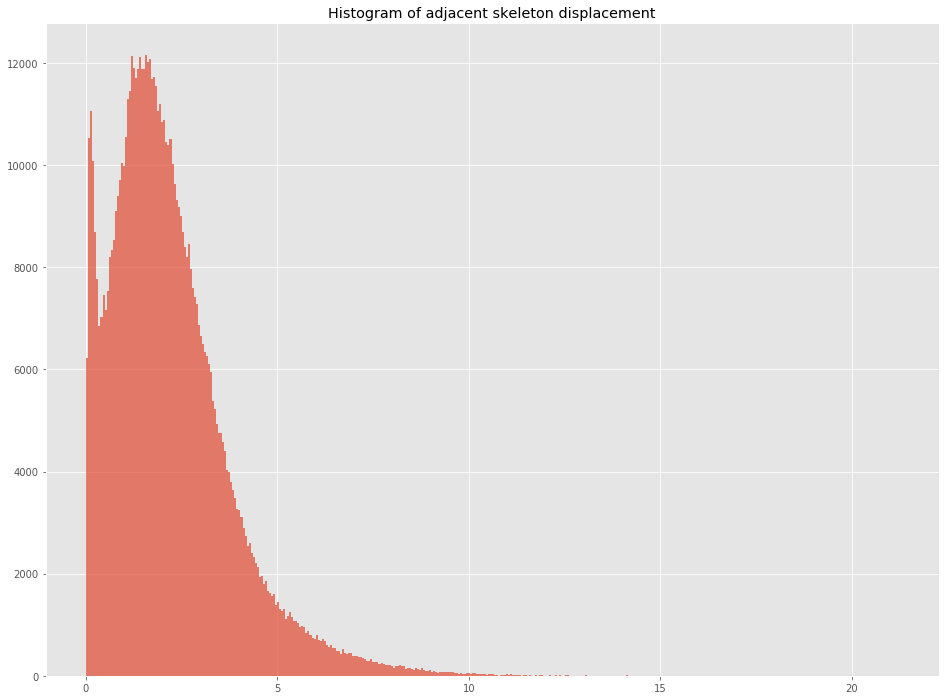

In [10]:
fig = plt.figure(figsize=(16, 12))
_ = plt.hist(np.concatenate(dis_list), bins=400, alpha=0.7)
_ = plt.title("Histogram of adjacent skeleton displacement")

In [8]:
keep_percentage = 45
print("The Threshold for keeping {:}% frames are {:}".format(keep_percentage, np.percentile(np.concatenate(dis_list), 100 - keep_percentage)))

The Threshold for keeping 45% frames are 2.0819192217640703


# Generate Master version

## Meta Data fields
 - ImgID (unique across whole dataset)
 - Source file path
 - Destination file path
 - Session date
 - Subject name
 - Takename
 - Camera ID
 - Camera+Time parameter file
 - Source camera timestamp (in millisecond)
 - Aligned mocap timestamp (in 120fps)
 - Geometry name
 - 53 markers
 - 34 Joints
 - Is in GPA1.0 (adaptive sampling)
 - Is in test set
 - Camera+Time parameter file

In [6]:
adaptive_threshold = 2.0819192217640703

In [7]:
import Execution as exe
import h5py

In [8]:
dst_rt = "/mnt/10T/GPA_master"
src_rt = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging"
src_path = augpath(src_rt)
dst_path = augpath(dst_rt)

In [10]:
dst_cam_dir = "spacetime_camera"

In [ ]:
for subj in subj2day:
    exe.run_command(["mkdir", dst_path(subj)])

In [9]:
cam_io = fio.CamParamDir(src_path(camparam_dir))
time_io = fio.TimeParamDir(src_path(timecorr_dir))

In [11]:
exe.run_command(["mkdir", dst_path(dst_cam_dir)])

In [14]:
for subj, record in time_io.subj_take_table.items():
    for takename, _ in record.items(): 
        cam_param = fio.load_pkl(cam_io.get_camparam_file(subj, takename))
        for cam in ["00", "01", "02", "03", "04"]:
            if not cam_io.is_blocklisted(subj, takename, cam):
                params = {"spatial": cam_param[cam],
                          "temporal": time_io.get_timeparam(subj, takename)[cam]}
                print(subj, takename, params)
                filename = "{:}/{:}-{:}-{:}-stcams.pkl".format(
                    dst_cam_dir, subj, takename, cam)
                fio.dump_pkl(params, dst_path(filename))

yan zw_static_02 {'temporal': (array([0.15021348]), -50847.53889595425, 27, 24), 'spatial': (array([[1.07150696e+03, 0.00000000e+00, 9.70030350e+02],
       [0.00000000e+00, 1.07711348e+03, 5.37264936e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([[0.02882477, 0.00233292, 0.00097522, 0.00429599, 0.        ]]), array([[-3.01512233],
       [-0.0067695 ],
       [ 0.89696023]]), array([[-169.4252475 ],
       [ 132.305085  ],
       [ 434.25115028]]), (1080, 1920))}
yan zw_static_02 {'temporal': (array([0.15]), -3700.1327500000007, 29, 29), 'spatial': (array([[1.07847075e+03, 0.00000000e+00, 9.42415150e+02],
       [0.00000000e+00, 1.08197464e+03, 5.24576326e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([[ 0.11334837, -0.15921999, -0.00456519, -0.00361481,  0.        ]]), array([[-1.83149289],
       [ 0.04449911],
       [-2.67328949]]), array([[ 87.18222715],
       [138.65887362],
       [538.7146398 ]]), (1080, 1920))}
yan zw_static_0

In [45]:
def is_adaptive_sampled(prev, cur):
    dis_per_joint = np.sqrt(np.sum((cur - prev) ** 2, axis=1))
    return np.percentile(dis_per_joint, 75) >= adaptive_threshold

# For a single subject

In [61]:
subj, takename = "haoyu", "motion_00"

In [62]:
subjtake_cam = {}

In [71]:
cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
imgdir_io = fio.ImgDirIO(src_path(subj2day[subj]), subj, takename)
viddir_io = fio.VideoDirIO(src_path(subj2day[subj]), subj, takename)
marker_io = fio.MarkerDirIO(src_path(marker_dir))
joint_io = fio.BVHDirIO(src_path(bvh_dir))
img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

subjtake_cam[(subj, takename)] = cam_dict

In [72]:
# Global

imgid_cntr = 0

In [73]:
def gen_img():
    # Take-specific
    cam_last_test_time = {"00": 0.0, "01": 0.0, "02": 0.0, "03": 0.0, "04": 0.0}
    cam_f_ind = {"00": 0, "01": 0, "02": 0, "03": 0, "04": 0}
    cam_last_joint = {}

    # Don't start blocklisted cameras in the beginning
    for cam in cam_f_ind:
        if cam_io.is_blocklisted(subj, takename, cam):
            cam_f_ind[cam] = None 

    while not all(v is None for v in cam_f_ind.values()):
        for cam in ["00", "01", "02", "03", "04"]:
            # Termination Criteria
            if cam_f_ind[cam] is None:
                pass
            elif cam_f_ind[cam] >= img_reader.get_frame_num_for_cam(cam):
                cam_f_ind[cam] = None
            elif int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, cam_f_ind[cam]))) >= mkr_reader.get_joint_frame_num():
                cam_f_ind[cam] = None

            # Begin loading
            else:
                cam_t = cam_f_ind[cam]
                mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, cam_t)))
                print(cam_t, mocap_t)
                
                # Increment Right away
                cam_f_ind[cam] += 1
                
                if mocap_t >= 0:
                    joints = mkr_reader.read_raw_joint(mocap_t)
                    # Included clips
                    if ~np.any(np.isnan(joints)):
                        # ImageID
                        imgid = imgid_cntr
                        imgid_cntr += 1

                        # Source File, Read File, Frame, Camera Timestamp
                        if cam in ["03", "04"]:
                            src_file = viddir_io.cam_subj_take_file[cam][subj][takename]
                            read_file = None

                            frame, cam_ts = viddir_io.read_cam_frame_ts(cam, cam_t)
                        else:
                            src_file, cam_ts = imgdir_io.get_imgfile_timestamp(cam)[cam_t]
                            read_file = src_file
                            frame = None
                        # Mocap timestamp
                        mocap_ts = time_io.map_cam_timestamp_2mocap(subj, takename, cam, cam_t)
                        # Session Date
                        sess_date = subj2day[subj]
                        # Camera Param files
                        cam_param_f = "{:}/{:}-{:}-{:}-stcams.pkl".format(dst_cam_dir, subj, takename, cam)
                        # Joints and Marker
                        markers = mkr_reader.read_raw_skel(mocap_t)
                        # Geometry name
                        geo_name = "_".join(subj2camparam[subj].split(".")[0].split("_")[:2])
                        # Adaptive sampling
                        if cam not in cam_last_joint:
                            cam_last_joint[cam] = joints
                            is_gpa1 = True
                        else:
                            is_gpa1 = is_adaptive_sampled(cam_last_joint[cam], joints)
                            cam_last_joint[cam] = joints
                        # Test Set
                        if joint_io.subj_take_table[sub][take]["is_test"]:
                            is_test = True
                        else:
                            # Start a new test/train split
                            if mocap_ts - cam_last_test_time[cam] > 10 * 120:
                                is_test = True
                                cam_last_test_time[cam] = mocap_ts
                            elif mocap_ts - cam_last_test_time[cam] > 1 * 120:
                                is_test = False
                            else:
                                is_test = True
                        yield imgid, src_file, read_file, frame, cam_ts, mocap_ts, sess_date, cam_param_f, markers, geo_name, is_gpa1, is_test

In [74]:
for _, fields in zip(range(5), gen_img()):
    imgid, src_file, read_file, frame, cam_ts, mocap_ts, sess_date, cam_param_f, markers, geo_name, is_gpa1, is_test = fields
    print(imgid, src_file, read_file, cam_ts, mocap_ts, sess_date, cam_param_f, markers)

0 -64873
0 -84731
0 -87120
0 1328
0 277
1 -64873
1 -84731
1 -87120
1 1328
1 277
2 -64873
2 -84730
2 -87120
2 1329
2 277
3 -64873
3 -84730
3 -87120
3 1329
3 277
4 -64872
4 -84730
4 -87120
4 1329
4 278
5 -64872
5 -84730
5 -87119
5 1329
5 278
6 -64872
6 -84730
6 -87119
6 1329
6 278
7 -64872
7 -84730
7 -87119
7 1329
7 278
8 -64872
8 -84730
8 -87119
8 1329
8 278
9 -64872
9 -84729
9 -87119
9 1329
9 278
10 -64871
10 -84729
10 -87119
10 1330
10 278
11 -64871
11 -84729
11 -87119
11 1330
11 278
12 -64871
12 -84729
12 -87118
12 1330
12 278
13 -64871
13 -84729
13 -87118
13 1330
13 279
14 -64871
14 -84729
14 -87118
14 1330
14 279
15 -64871
15 -84729
15 -87118
15 1330
15 279
16 -64871
16 -84728
16 -87118
16 1330
16 279
17 -64870
17 -84728
17 -87118
17 1330
17 279
18 -64870
18 -84728
18 -87117
18 1330
18 279
19 -64870
19 -84728
19 -87117
19 1331
19 279
20 -64870
20 -84728
20 -87117
20 1331
20 279
21 -64870
21 -84728
21 -87117
21 1331
21 280
22 -64870
22 -84727
22 -87117
22 1331
22 280
23 -64870
23 -8

In [68]:
imgid_cntr

0

In [31]:
"_".join(subj2camparam["liyan"].split(".")[0].split("_")[:2])

'20180831_liyan'

In [60]:
print(5)

5
